In [1]:
import os
import pandas as pd
import numpy as np
import helpers

from sklearn.model_selection import train_test_split


In [2]:
organism = 'atha'

In [5]:
df = pd.read_csv('./data/cub2.csv', index_col=0)
df = df[df['species'] == organism]

In [6]:
set(df['species'])

{'atha'}

In [7]:
df = helpers.add_codons_to_df(df, 'Sequence')
df.columns

Index(['GeneName', 'median_exp', 'Sequence', 'species', 'mlphi_est', 'CAI',
       'CAI2', 'codons_cleaned'],
      dtype='object')

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

In [38]:
from sklearn.preprocessing import normalize
labels = normalize([np.log(df_test['median_exp'])])[0]

In [39]:
labels

array([ 0.06138343, -0.01599121, -0.00910417, ...,  0.03546652,
        0.00688704,  0.        ])

In [40]:
df['labels']

0       0.016412
1      -0.007185
2       0.010705
3      -0.010280
4       0.012515
          ...   
1302    0.018771
1303    0.015936
1304    0.003094
1305   -0.003094
1306   -0.010280
Name: labels, Length: 1307, dtype: float64

In [35]:
l = []

with open('./results/codonBERT_binary_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
l2 = []

with open('./results/codonBERT_binary_reg_labels_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l2.append(float(line))

z = zip(l, l2)
z = list(z)

df = pd.DataFrame(z, columns=['preds', 'labels'])
df.shape
#df_test['BERT-CUB-b'] = l
#df_test['BERT-CUB-b'] = l[:-1]

(1307, 2)

In [11]:
l = []

with open('./results/codonBERT_multi_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
df_test['BERT-CUB-m'] = l
#df_test['BERT-CUB-m'] = l[:-1]

ValueError: Length of values (1307) does not match length of index (1306)

In [42]:
df_test['log_median_exp'] = np.log(df_test['median_exp'])

In [41]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

def spearman_plot(df, y_col, x_col, title, c_s='#068cf9', c_l='#ff0051'):
    rho, p = spearmanr(df[y_col], df[x_col], nan_policy='omit')
    
    ax = sns.lmplot(df, x=x_col, y=y_col, scatter_kws={'color': c_s}, line_kws={'color': c_l})
    ax.fig.text(0.25, 0.9, 'r_s = '+str(round(rho, 3)), color=c_l)
    
    plt.title(title)
    plt.xlabel('Median Expression (log)')
    plt.ylabel('Predicted Expression')
    
    plt.show()
    plt.clf()

In [284]:
df_test.columns

Index(['GeneName', 'median_exp', 'Sequence', 'species', 'mlphi_est', 'CAI',
       'CAI2', 'codons_cleaned', 'log_median_exp'],
      dtype='object')

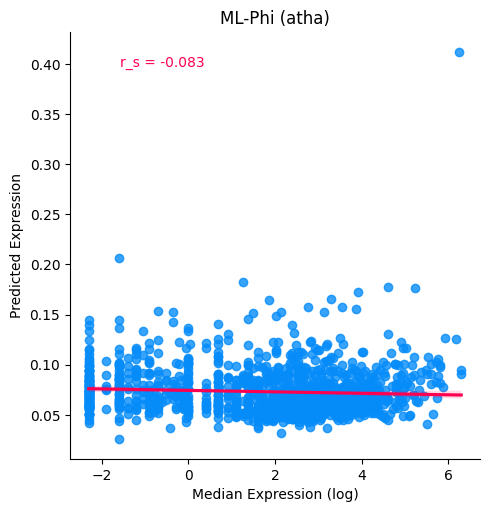

<Figure size 640x480 with 0 Axes>

In [43]:
spearman_plot(df_test, 'mlphi_est', 'log_median_exp', 'ML-Phi ({})'.format(organism))

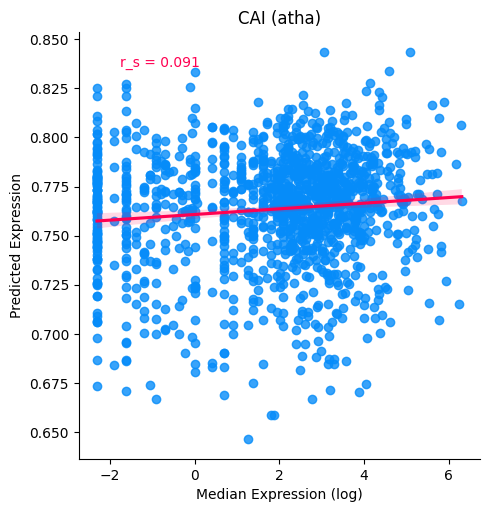

<Figure size 640x480 with 0 Axes>

In [44]:
spearman_plot(df_test, 'CAI2', 'log_median_exp', 'CAI ({})'.format(organism))

In [287]:
spearman_plot(df_test, 'BERT-CUB-b', 'log_median_exp', 'Binary CodonBERT ({})'.format(organism))

In [288]:
spearman_plot(df_test, 'BERT-CUB-m', 'log_median_exp', 'Multiclass CodonBERT ({})'.format(organism))